In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [2]:
df=pd.read_csv("with_sentiment (2).csv")
df

,CustomerID,Name,Age,Gender,Geography,Native_Place,Marital_Status,Tenure,Account_Type,Balance,...,Loan_Status,EMI_Amount,Exited,Branch_Code,Account_Open_Date,Last_Transaction_Date,Customer_Review,Emoji_Sentiment,Text_Sentiment,Combined_Sentiment
0,CID000001,Sunita Sharma,21,Other,Tamil Nadu,Hyderabad,Married,4,Current,676699.49,...,Auto,4238.57,0,BR072,2024-03-10,2024-06-23,Reasonable fees 💲,0.0,0.0000,0.00000
1,CID000002,Amit Kumar,53,Male,Karnataka,Pune,Divorced,8,Premium,215313.76,...,Business,30226.31,0,BR094,2020-02-26,2024-08-20,Professional staff 🌟,1.0,0.0000,0.60000
2,CID000003,Rohan Gupta,55,Other,West Bengal,Lucknow,Married,2,Savings,661263.32,...,Education,43308.58,0,BR021,2024-04-07,2024-11-21,Great mobile app 🥰,1.0,0.9081,0.96324
3,CID000004,Sunita Iyer,27,Other,Karnataka,Jaipur,Married,5,NRI,379455.44,...,Business,19905.26,0,BR028,2022-02-15,2024-12-11,Professional staff 🌟,1.0,0.0000,0.60000
4,CID000005,Priya Iyer,76,Male,Tamil Nadu,Bangalore,Married,17,Senior Citizen,747013.81,...,Multiple,27711.22,0,BR015,2021-11-16,2024-07-04,Professional staff 🌟,1.0,0.0000,0.60000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CID099996,Rohan Gupta,44,Male,Telangana,Chennai,Widowed,14,Joint,678326.81,...,Gold,0.00,0,BR081,2025-03-12,2024-08-31,Great mobile app 🥰,1.0,0.9081,0.96324
99996,CID099997,Amit Singh,62,Male,West Bengal,Bangalore,Widowed,13,Current,836294.17,...,Auto,9337.87,0,BR086,2016-03-02,2024-11-04,Excellent service! 😊,1.0,0.8748,0.94992
99997,CID099998,Sunita Rao,59,Female,Karnataka,Lucknow,Divorced,3,NRI,537264.63,...,Gold,10962.54,0,BR062,2023-04-21,2024-10-17,Great mobile app 🥰,1.0,0.9081,0.96324
99998,CID099999,Neha Gupta,50,Male,Telangana,Pune,Divorced,4,Salary,386295.37,...,Multiple,83598.98,0,BR019,2022-08-07,2024-12-06,No waiting time ⚡,1.0,-0.2960,0.48160


In [3]:
Y=df['Exited']
X=df.copy()

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


In [7]:
train_df = X_train.copy()
train_df['Exited'] = Y_train
branch_churn_rate = train_df.groupby('Branch_Code')['Exited'].mean()



In [8]:
branch_churn_rate

,Exited
Branch_Code,
BR001,0.297090
BR002,0.303120
BR003,0.286350
BR004,0.296073
BR005,0.274170
...,...
BR096,0.297730
BR097,0.326531
BR098,0.324207


In [9]:
X_train['Branch_Churn_Rate'] = X_train['Branch_Code'].map(branch_churn_rate)
X_test['Branch_Churn_Rate'] = X_test['Branch_Code'].map(branch_churn_rate)

In [10]:
cols_to_drop = [
    'Exited', 'Customer_Review', 'CustomerID', 'Name', 'Emoji_Sentiment',
    'Text_Sentiment', 'Branch_Code', 'Account_Open_Date', 'Last_Transaction_Date'
]

X_train = X_train.drop(columns=cols_to_drop, errors='ignore')
X_test = X_test.drop(columns=cols_to_drop, errors='ignore')


In [12]:
categorical=[i for i in X_train.columns if X_train[i].dtypes=='O']
numerical=[i for i in X_train.columns if X_train[i].dtypes!='O']

In [13]:
categorical

['Gender',
 'Geography',
 'Native_Place',
 'Marital_Status',
 'Account_Type',
 'Loan_Status']

In [14]:
numerical

['Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Monthly_Income',
 'CreditScore',
 'EMI_Amount',
 'Combined_Sentiment',
 'Branch_Churn_Rate']

In [23]:
e = OneHotEncoder(drop='first', sparse_output=False)

e.fit(X_train[categorical])

OneHotEncoder(drop='first', sparse_output=False)

In [24]:
X_train_e = e.transform(X_train[categorical])
X_test_e= e.transform(X_test[categorical])

In [25]:
e_col_names = e.get_feature_names_out(categorical)
X_train_cat = pd.DataFrame(X_train_e, columns=e_col_names, index=X_train.index)
X_test_cat = pd.DataFrame(X_test_e, columns=e_col_names, index=X_test.index)

In [27]:
X_train_final = pd.concat([X_train[numerical].reset_index(drop=True), X_train_cat.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test[numerical].reset_index(drop=True), X_test_cat.reset_index(drop=True)], axis=1)

In [30]:
print(X_train_final.shape,
X_test_final.shape,
Y_train.shape,
Y_test.shape)

(70000, 47) (30000, 47) (70000,) (30000,)


In [32]:
rfc=RandomForestClassifier(n_estimators=100, max_depth=10,
    min_samples_split=10, random_state=0)     #10=88.04  100=~89
rfc.fit(X_train_final, Y_train)
Y_pred=rfc.predict(X_test_final)

In [33]:
print('Model testing accuracy:{0:0.4f}'.format(accuracy_score(Y_test, Y_pred)))

Model testing accuracy:0.8894


In [35]:
Y_train_pred = rfc.predict(X_train_final)

print('Model training accuracy:{0:0.4f}'.format(accuracy_score(Y_train, Y_train_pred)))

Model training accuracy:0.8950


In [41]:
#help(RandomForestClassifier)
feature_names=X_train_final.columns
feature_importance=pd.DataFrame(rfc.feature_importances_, index=feature_names).sort_values(0,ascending=False)
feature_importance.head(5)

,0
Combined_Sentiment,0.445577
IsActiveMember,0.323043
Loan_Status_Multiple,0.057118
EMI_Amount,0.050696
Age,0.027413


<Axes: title={'center': 'Feature Importance'}>

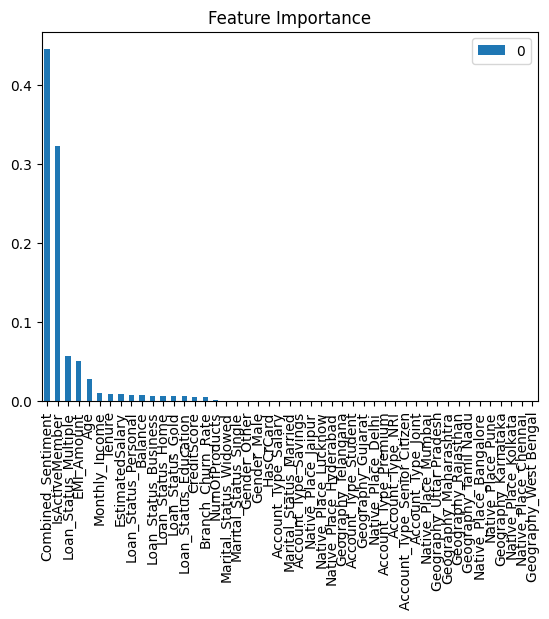

In [42]:
feature_importance.plot(kind='bar', title='Feature Importance')